<a href="https://colab.research.google.com/github/YuktaRajput07/CODSOFT/blob/main/Task2_Codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("/content/IMDb Movies India.csv", encoding="ISO-8859-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
columns_to_drop = ['Movie_ID', 'Description', 'Name', 'Year']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns], errors='ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['Director', 'Genre', 'Actor 1', 'Actor 2', 'Actor 3']:
    if col in data.columns:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col].astype(str))

In [ ]:
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.median()))

In [ ]:
data['Duration'] = data['Duration'].astype(str).str.extract('(\d+)').astype(float)
data['Votes'] = data['Votes'].astype(str).replace(',', '', regex=True)
data['Votes'] = data['Votes'].apply(lambda x: x.strip() if isinstance(x, str) else x)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Duration'] = data['Duration'].fillna(data['Duration'].median())
data['Votes'] = data['Votes'].fillna(data['Votes'].median())
scaler = StandardScaler()
numerical_cols = ['Duration', 'Votes']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Duration', 'Votes']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
data = data.dropna(subset=['Rating'])
X = data.drop('Rating', axis=1)
y = data['Rating']

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.7887582324911347
R-squared Score: 0.18886227245795062


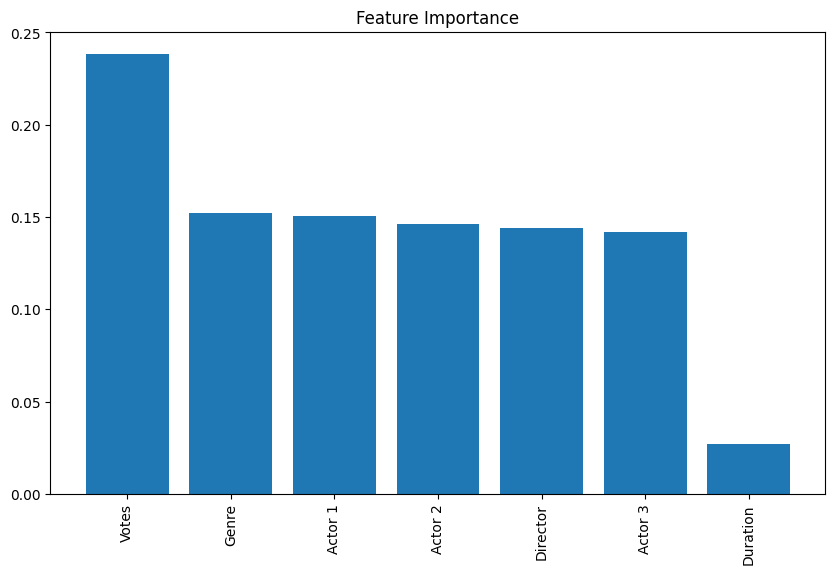

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()